# Instacart Market Basket Analysis

### The dataset for this analysis is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


Bad key savefig.frameon in file C:\Users\dipali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\dipali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\dipali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc 

In [3]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
orders["eval_set"].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [5]:
# checking which columns having nan values
orders.isna().any()

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

In [6]:
# as u can see only days_since_prior_order is nan values so we fill it with 0
orders["days_since_prior_order"] = orders["days_since_prior_order"].fillna(value=0)

#### only days_since_order in orders.csv file has missing values so we are filling it with 0

In [7]:
aisles = pd.read_csv("aisles.csv")
aisles.isna().any()

aisle_id    False
aisle       False
dtype: bool

In [8]:
departments = pd.read_csv("departments.csv")
departments.isna().any()

department_id    False
department       False
dtype: bool

In [9]:
order_prior = pd.read_csv("order_products__prior.csv")
order_prior.isna().any()

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

In [11]:
products = pd.read_csv("products.csv")
products.isna().any()

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

In [12]:
order_products__train = pd.read_csv("order_products__train.csv")
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
print(order_prior.shape)
print(orders.shape)
print(aisles.shape)
print(products.shape)
print(departments.shape)

(32434489, 4)
(3421083, 7)
(134, 2)
(49688, 4)
(21, 2)


In [14]:
# from checking shapes we will merge all the dataframes based on their keys
df = order_prior.merge(products,on='product_id').merge(aisles,on='aisle_id').merge(departments,on='department_id').reset_index(drop=True)

In [15]:
df.sample(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
28641276,1109738,436,22,1,Petite Brussels Sprouts,116,1,frozen produce,frozen
17438157,2941448,47380,5,1,New York Style Nova Lox,15,12,packaged seafood,meat seafood
20298649,55901,8056,17,1,Berry Bounty Trail Mix,125,19,trail mix snack mix,snacks
11315613,860462,24852,10,1,Banana,24,4,fresh fruits,produce
12800736,3266801,37646,10,1,Organic Gala Apples,24,4,fresh fruits,produce


In [16]:
df.shape

(32434489, 9)

## Univariant analysis

In [17]:
products_top = df["product_name"].value_counts()

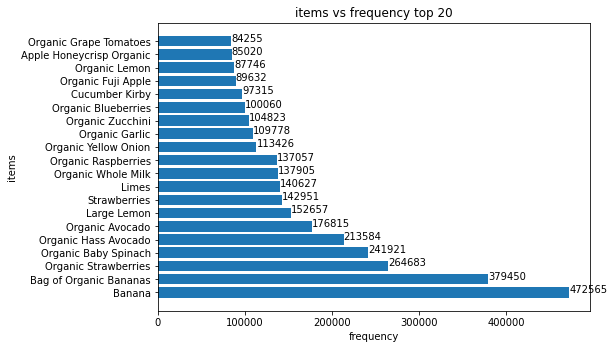

In [18]:
products_top_20 = dict(products_top.head(20))
product_name = list(products_top_20.keys())
product_freq = list(products_top_20.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(product_name, product_freq)
for index, value in enumerate(product_freq):
    plt.text(value, index, str(value))
plt.xlabel("frequency")
plt.ylabel("items")
plt.title("items vs frequency top 20")
plt.show()

### Observation:-
#### As u can see bananas are order more followed by bag of organinc bananas,Organic strawbeerries

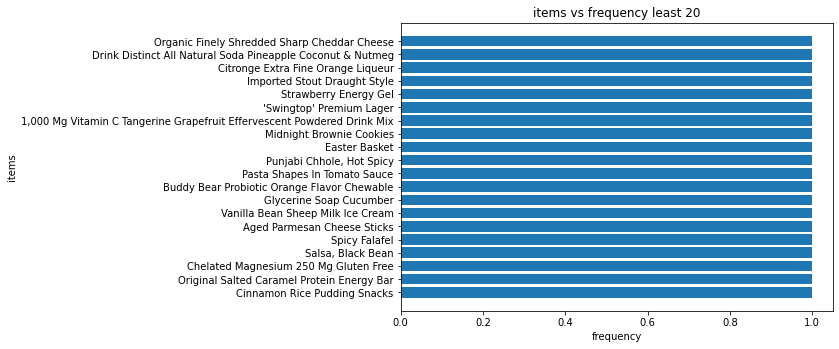

In [19]:
products_least_20 = dict(products_top.tail(20))
product_name = list(products_least_20.keys())
product_freq = list(products_least_20.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(product_name, product_freq)
plt.xlabel("frequency")
plt.ylabel("items")
plt.title("items vs frequency least 20")
plt.show()

### Observation:-
#### All the items are which are shown in the above are least ordered their frequency of ordering is only 1


In [20]:
department_top = df["department"].value_counts()

In [21]:
department_top.shape

(21,)

In [22]:
department_top.head()

produce       9479291
dairy eggs    5414016
snacks        2887550
beverages     2690129
frozen        2236432
Name: department, dtype: int64

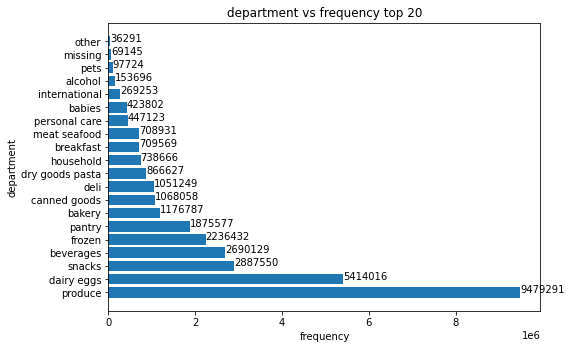

In [23]:
department_top_20 = dict(department_top.head(20))
department_name = list(department_top_20.keys())
department_freq = list(department_top_20.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(department_name, department_freq)
for index, value in enumerate(department_freq):
    plt.text(value, index, str(value))
plt.xlabel("frequency")
plt.ylabel("department")
plt.title("department vs frequency top 20")
plt.show()

### Observation:-
#### Products from produce department are ordered more which is around 10**6 which close to one million followed by dairy eggs,snacks etc

In [24]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
df_mega = df.merge(orders,on="order_id")

In [26]:
df_mega.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0


In [27]:
def convertToDay(hour):
    if hour >=0 and hour <= 5:
        return "early_morning"
    elif hour >=6 and hour <=12:
        return "morning"
    elif hour>12 and hour <=16:
        return "after_noon"
    elif hour>16 and hour <=19:
        return "evening"
    else:
        return "night"

In [28]:
df_mega["period_day"] = df_mega["order_hour_of_day"].apply(convertToDay)

In [29]:
df_mega.sample(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,period_day
8803149,225930,34005,11,1,Black Seedless Grapes,24,4,fresh fruits,produce,200505,prior,27,2,10,3.0,morning
18896968,1798827,42010,17,1,Artichoke Pesto,9,9,pasta sauce,dry goods pasta,195115,prior,11,4,9,3.0,morning
23600101,2534056,45918,13,0,Coconut Butter,19,13,oils vinegars,pantry,37761,prior,9,5,10,26.0,morning


In [30]:
# saving to csv file
df_mega.to_csv("mega.csv")

In [31]:
df_mega["eval_set"].value_counts()

prior    32434489
Name: eval_set, dtype: int64

In [32]:
df_period_count = df_mega["period_day"].value_counts()
df_period_count

morning          13483273
after_noon       10556831
evening           4986789
night             2810762
early_morning      596834
Name: period_day, dtype: int64

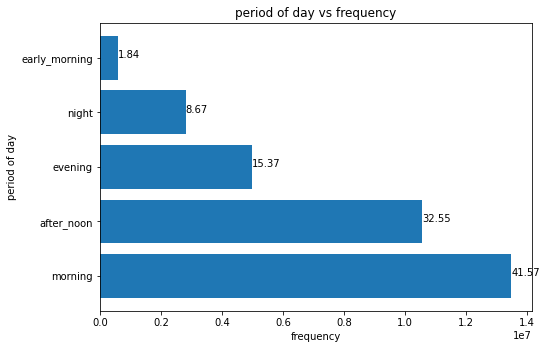

In [33]:
df_period_count = dict(df_period_count)
df_period_name = list(df_period_count.keys())
df_period_freq = list(df_period_count.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_period_name, df_period_freq)
for index, value in enumerate(df_period_freq):
    t = round((value/32434489)*100,2)
    plt.text(value, index, str(t))
plt.xlabel("frequency")
plt.ylabel("period of day")
plt.title("period of day vs frequency")
plt.show()

### Observation:-
#### 41.57% of purchases are happening on morning i.e in the time slot of 6-12 so more people are willing to buy at morning follwed by after noon

In [34]:
df_dow_count = df_mega["order_dow"].value_counts()

In [35]:
df_dow_count

0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: order_dow, dtype: int64

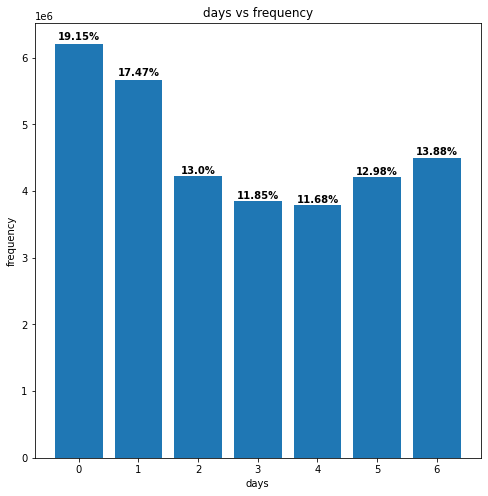

In [36]:
# https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/
df_dow_count = dict(df_dow_count)
df_dow_day = list(df_dow_count.keys())
df_dow_freq = list(df_dow_count.values())
plt.figure(figsize=(8,8))
graph = plt.bar(df_dow_day,df_dow_freq)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((df_dow_freq[i]/sum(df_dow_freq))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xlabel("days")
plt.ylabel("frequency")
plt.title("days vs frequency")
plt.show()

### Observation:-
#### More orders are made on day 0 follwed by 1 and day3 and day4 have same number of orders

In [37]:
df_reorder_count = df_mega["reordered"].value_counts()
df_reorder_count

1    19126536
0    13307953
Name: reordered, dtype: int64

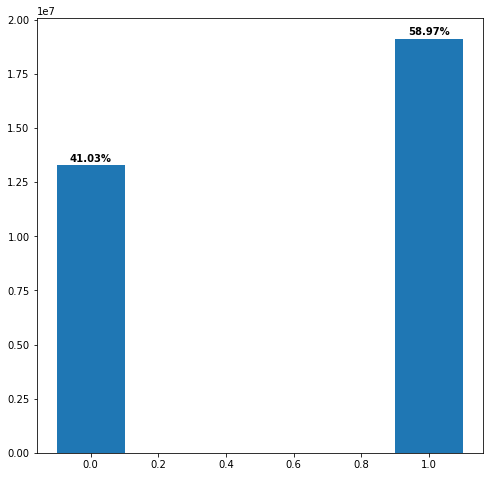

In [38]:
# https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/
df_reorder_count = dict(df_reorder_count)
df_reorder_name = list(df_reorder_count.keys())
df_reorder_freq = list(df_reorder_count.values())
plt.figure(figsize=(8,8))
# ax = fig.add_axes([0,0,1,1])
graph = plt.bar(df_reorder_name,df_reorder_freq,width=0.2)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((df_reorder_freq[i]/sum(df_reorder_freq))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

### Bivariant Analysis

In [39]:
df_mega = pd.read_csv("mega.csv")

In [40]:
# https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/
def getBarPlot(list_1,list_2,string_1,string_2):
    plt.figure(figsize=(15,15))
#     plt.subplot(1, 2, 1)
    graph = plt.bar(list_1,list_2,width=0.3)
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.01,
                 str(round((list_2[i]/sum(list_2))*100,2))+'%',
                 ha='center',
                 weight='bold')
        i+=1
    plt.xlabel(string_1)
    plt.ylabel(string_2)
    s = "% times"+" "+string_1+" "+"got reordered"
    plt.xticks(rotation=90)
    plt.show()

In [41]:
df_product_reorder = df_mega[["product_name","reordered"]]
df_product_reorder_new = df_product_reorder[df_product_reorder["reordered"] == 1]
df_product_order_new = df_product_reorder[df_product_reorder["reordered"] == 0]
df_product_reorder_new = df_product_reorder_new["product_name"].value_counts()
df_product_order_new = df_product_order_new["product_name"].value_counts()

In [44]:
df_pro_reorder = dict(df_product_reorder_new.head(20))
df_pro_order = dict(df_product_order_new.head(20))
df_pro = list(df_pro_reorder.keys())
df_pro_freq = list(df_pro_reorder.values())
df_pro_ord = list(df_pro_order.keys())
df_pro_ord_freq = list(df_pro_order.values())



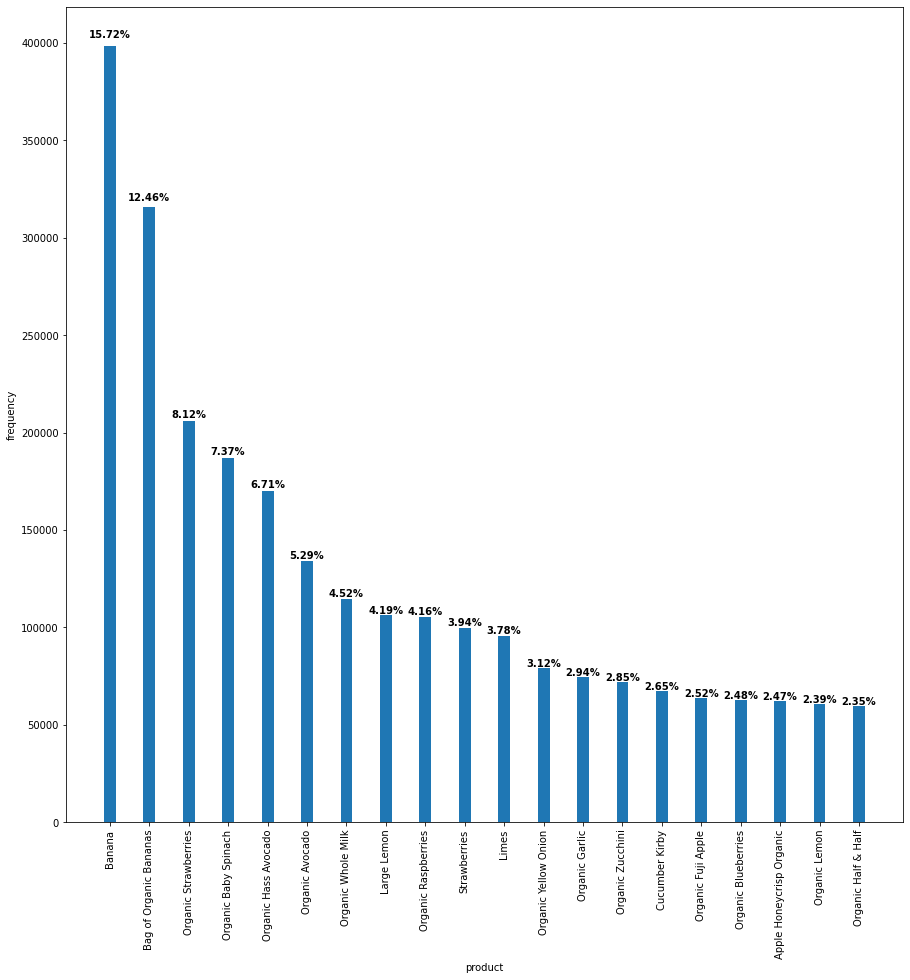

In [45]:
getBarPlot(df_pro,df_pro_freq,"product","frequency")

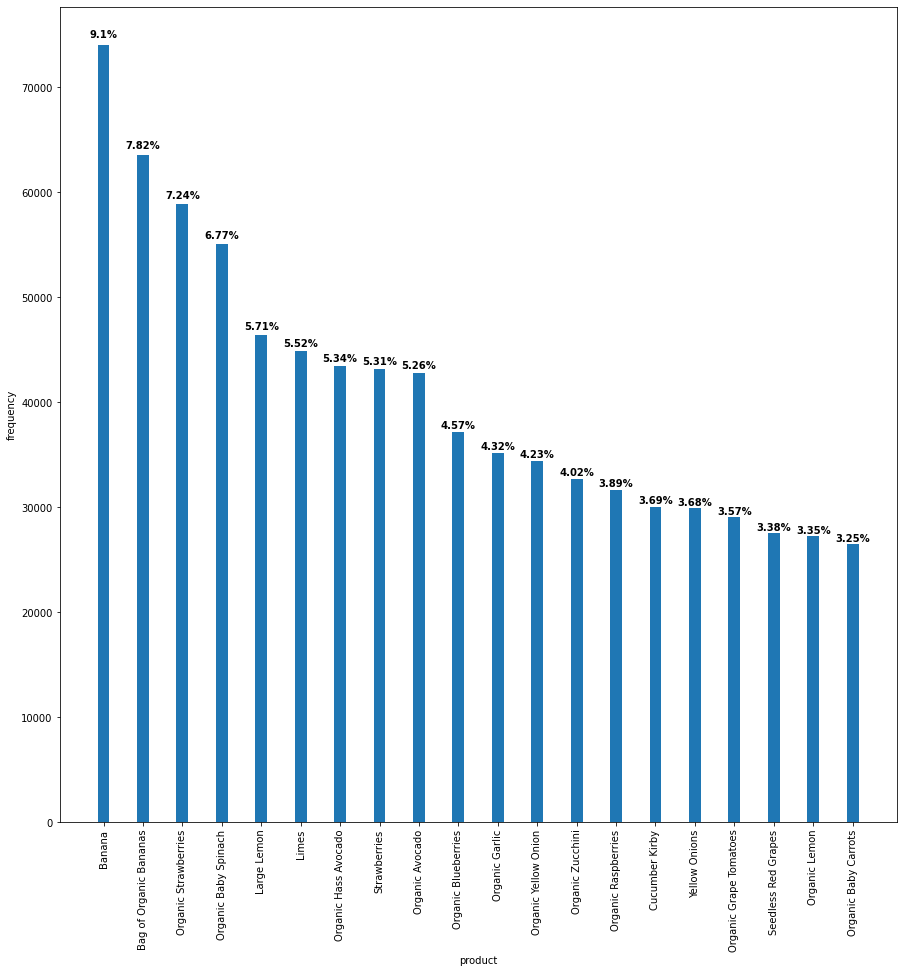

In [46]:
getBarPlot(df_pro_ord,df_pro_ord_freq,"product","frequency")

### Observation:-
#### Bananas are reordered most which is about 15.72% of total re orders and bananas are ordered most

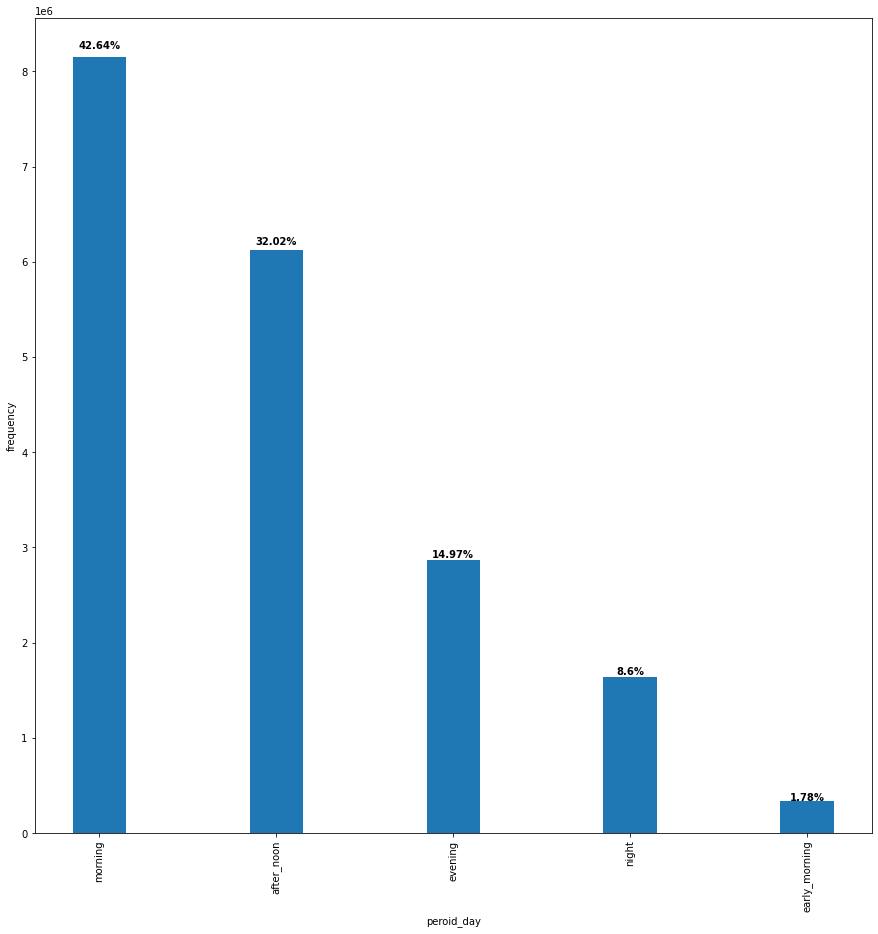

In [47]:
df_day_segment_reorder = df_mega[["period_day","reordered"]]
df_day_segment_reorder_new = df_day_segment_reorder[df_day_segment_reorder["reordered"] == 1]
df_day_segment_reorder_new = df_day_segment_reorder_new["period_day"].value_counts()
df_day_segment_reorder = dict(df_day_segment_reorder_new)
df_day_segment = list(df_day_segment_reorder.keys())
df_day_segment_freq = list(df_day_segment_reorder.values())


getBarPlot(df_day_segment,df_day_segment_freq,"peroid_day","frequency")

### Observation:-
#### More than 70% of people reorder on the morning and afternoon

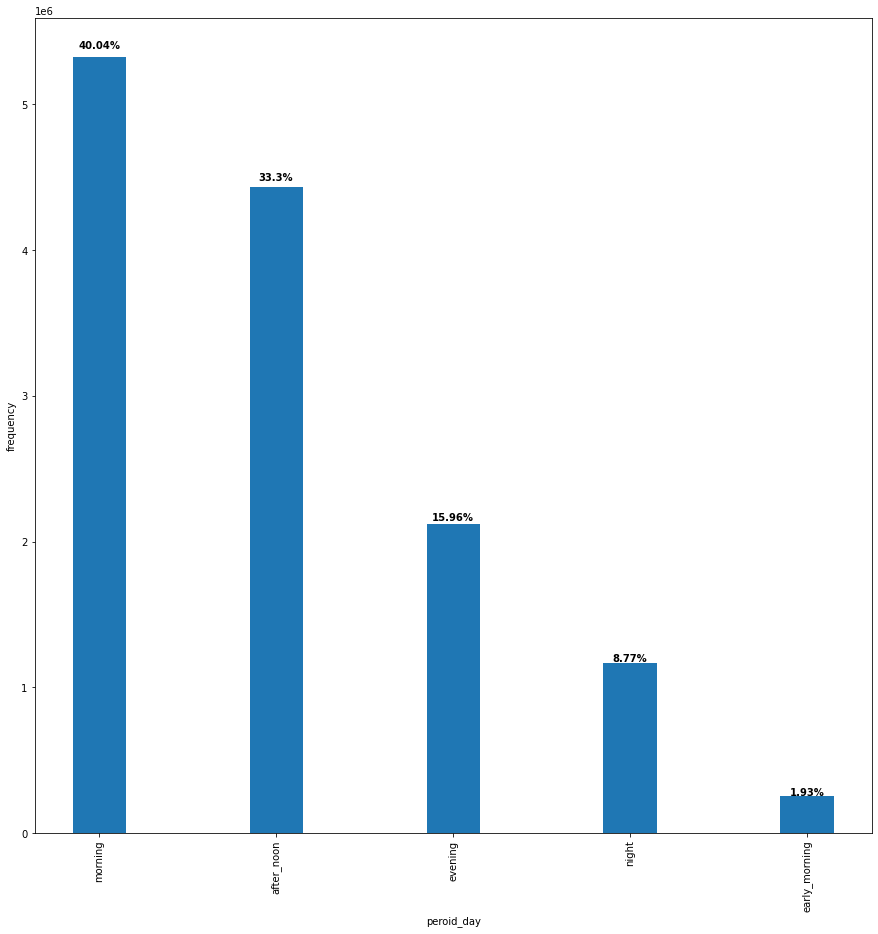

In [48]:
df_day_segment_reorder = df_mega[["period_day","reordered"]]
df_day_segment_order_new = df_day_segment_reorder[df_day_segment_reorder["reordered"] == 0]
df_day_segment_order_new = df_day_segment_order_new["period_day"].value_counts()
df_day_segment_order = dict(df_day_segment_order_new)
# print(df_day_segment_order)
df_day_segment_orders = list(df_day_segment_order.keys())
df_day_segment_order_freq = list(df_day_segment_order.values())
getBarPlot(df_day_segment_orders,df_day_segment_order_freq,"peroid_day","frequency")

### Observation:-
#### More no of orders are placed on morning segment of the day

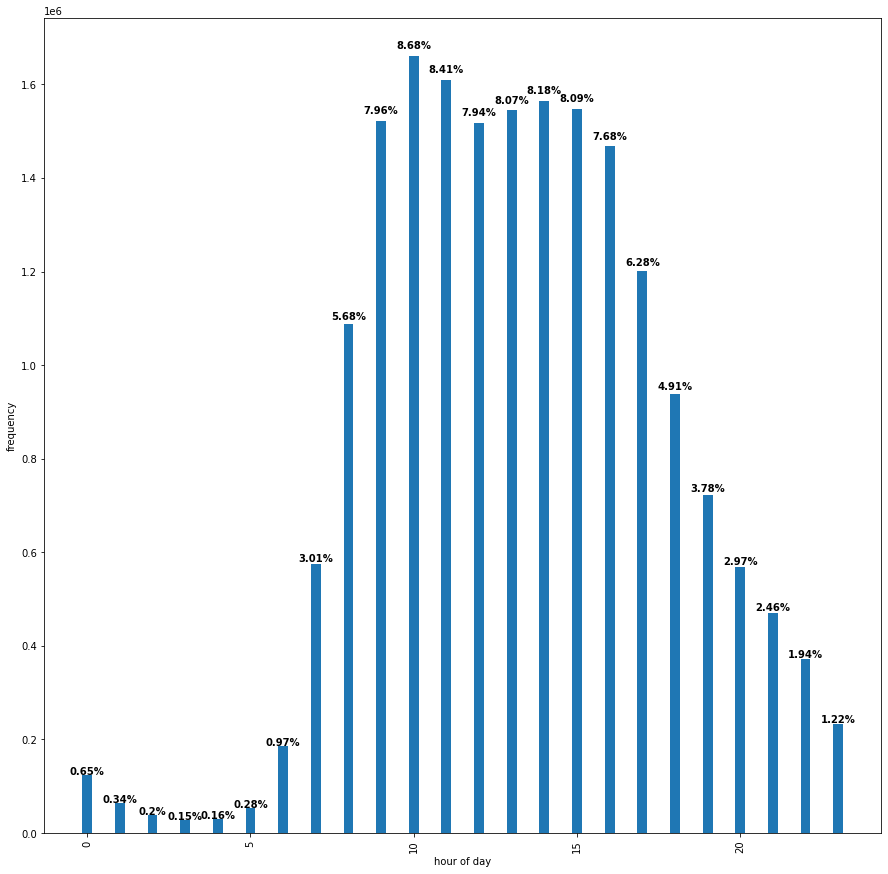

In [49]:
# order_hour_of_day
df_hour_day_reorder = df_mega[["reordered","order_hour_of_day"]]
df_hour_day_reorder_new = df_hour_day_reorder[df_hour_day_reorder["reordered"] == 1]
df_hour_day_reorder_new = df_hour_day_reorder_new["order_hour_of_day"].value_counts()
df_hour_day_reorder = dict(df_hour_day_reorder_new)
df_hour_segment = list(df_hour_day_reorder.keys())
df_hour_segment_freq = list(df_hour_day_reorder.values())
getBarPlot(df_hour_segment,df_hour_segment_freq,"hour of day","frequency")

### Observation:-
#### On 10th hour of the day products are reordered most

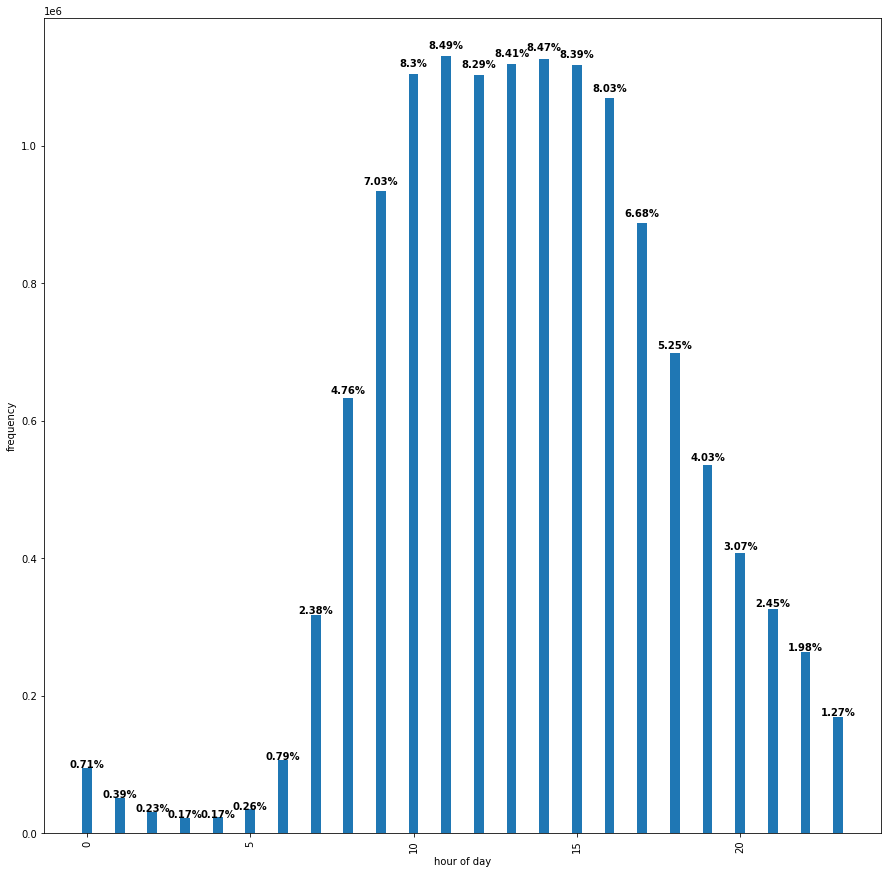

In [50]:
# order_hour_of_day
df_hour_day_reorder = df_mega[["reordered","order_hour_of_day"]]
df_hour_day_reorder_new = df_hour_day_reorder[df_hour_day_reorder["reordered"] == 0]
df_hour_day_reorder_new = df_hour_day_reorder_new["order_hour_of_day"].value_counts()
df_hour_day_reorder = dict(df_hour_day_reorder_new)
df_hour_segment = list(df_hour_day_reorder.keys())
df_hour_segment_freq = list(df_hour_day_reorder.values())
getBarPlot(df_hour_segment,df_hour_segment_freq,"hour of day","frequency")

### Observation:-
#### 11th hour of the day the products are ordered most

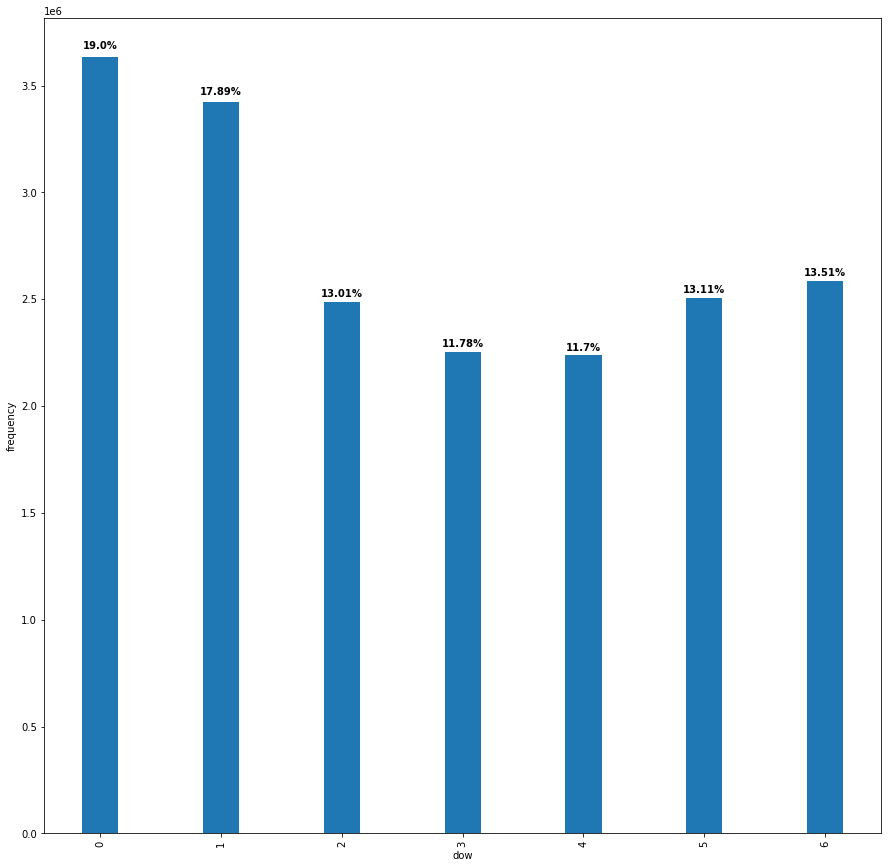

In [51]:
df_dow_reorder = df_mega[["order_dow","reordered"]]
df_dow_reorder_new = df_dow_reorder[df_dow_reorder["reordered"] == 1]
df_dow_reorder_new = df_dow_reorder_new["order_dow"].value_counts()

df_dow_reorder = dict(df_dow_reorder_new)
df_dow = list(df_dow_reorder.keys())
df_dow_freq = list(df_dow_reorder.values())
getBarPlot(df_dow,df_dow_freq,"dow","frequency")

### Observation:-
#### More people are likely to reorder on day 0 and day 1 day3 and day4 the reorder % is almost same

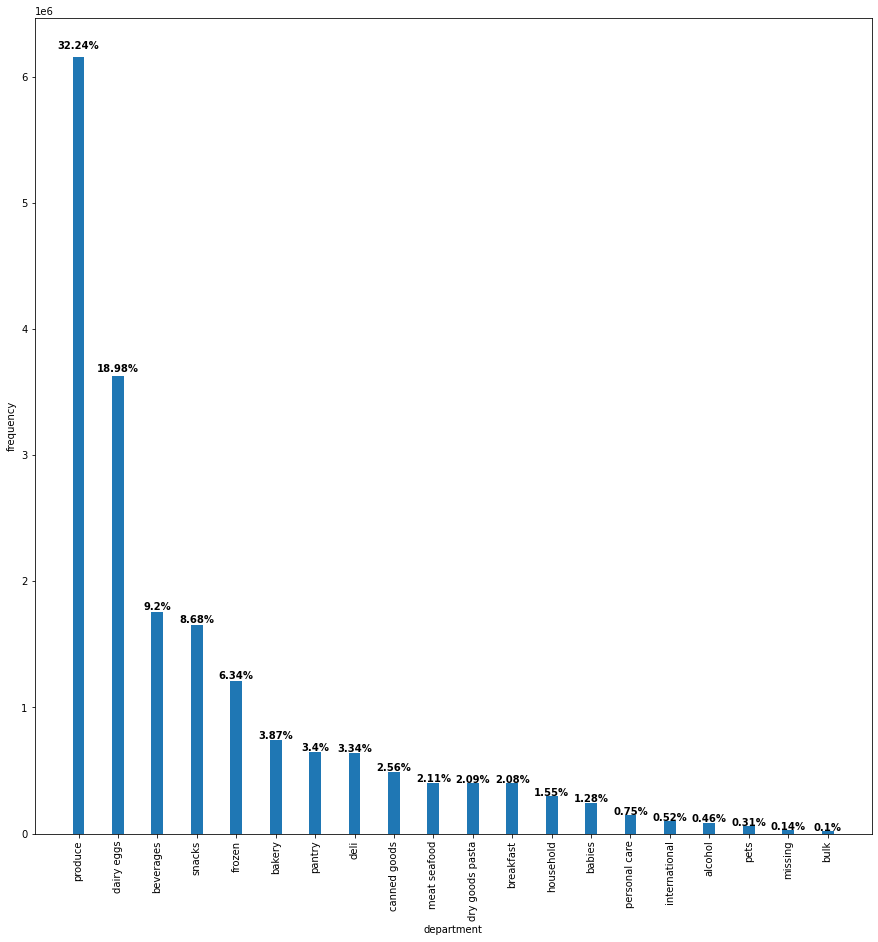

In [52]:
df_department_reorder = df_mega[["department","reordered"]]
df_department_reorder_new = df_department_reorder[df_department_reorder["reordered"] == 1]
df_department_reorder_new = df_department_reorder_new["department"].value_counts()

df_department_reorder = dict(df_department_reorder_new.head(20))
df_department = list(df_department_reorder.keys())
df_department_freq = list(df_department_reorder.values())
getBarPlot(df_department,df_department_freq,"department","frequency")

### Observation:-
#### Produce department holds majority of remaining departments its more than 30% hence the popularity of goods in this department is high than compared to others

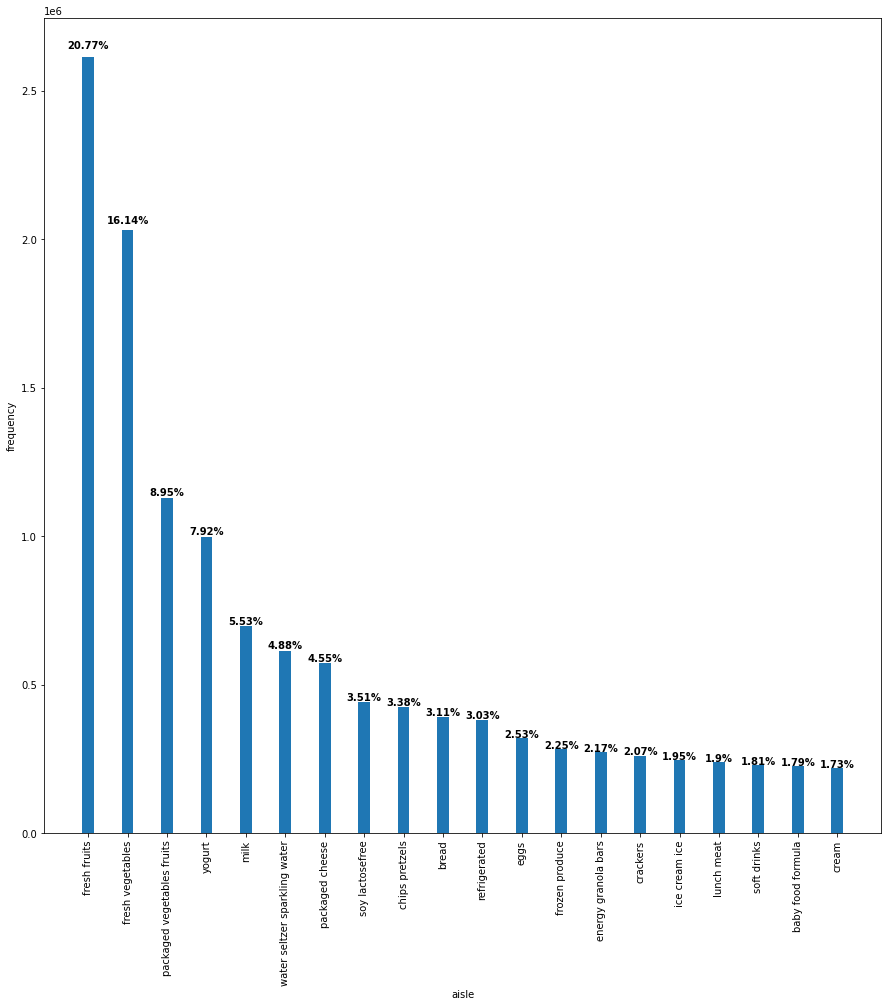

In [53]:
df_aisle_reorder = df_mega[["aisle","reordered"]]
df_aisle_reorder_new = df_aisle_reorder[df_aisle_reorder["reordered"] == 1]
df_aisle_reorder_new = df_aisle_reorder_new["aisle"].value_counts()

df_aisle_reorder = dict(df_aisle_reorder_new.head(20))
df_aisle = list(df_aisle_reorder.keys())
df_aisle_freq = list(df_aisle_reorder.values())
getBarPlot(df_aisle,df_aisle_freq,"aisle","frequency")

### Observation:-
#### As we can see fresh fruits and fresh vegetables have more demand than compared to others

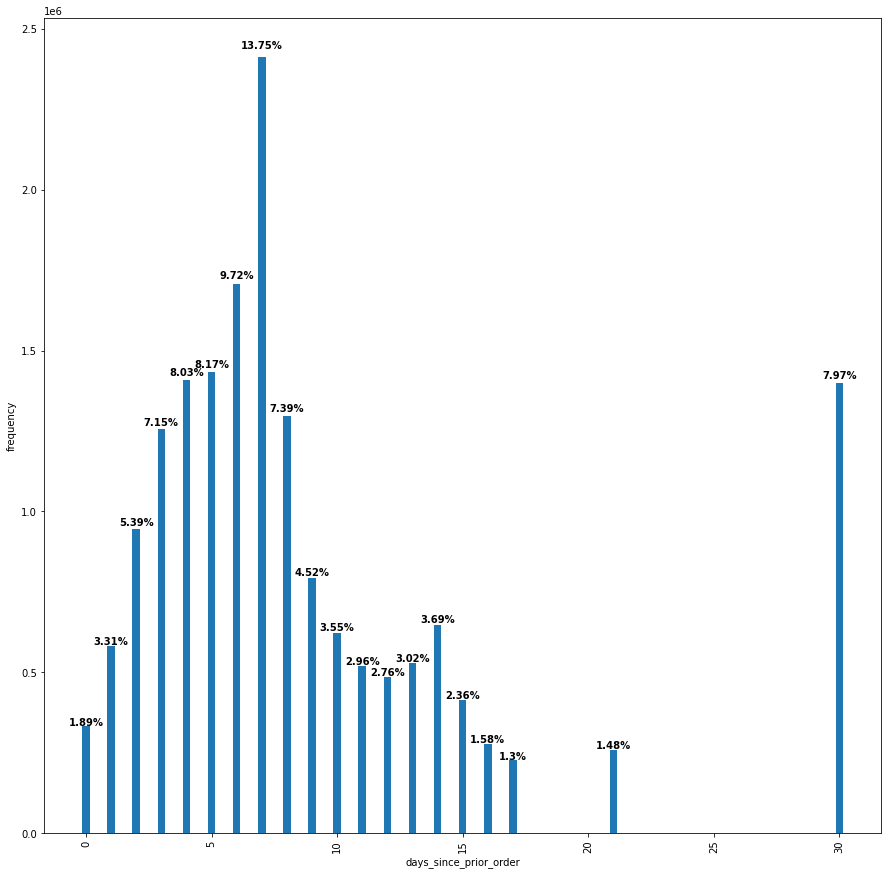

In [54]:
df_days_since_prior_order_reorder = df_mega[["days_since_prior_order","reordered"]]
df_days_since_prior_order_reorder_new = df_days_since_prior_order_reorder[df_days_since_prior_order_reorder["reordered"] == 1]
df_days_since_prior_order_reorder_new = df_days_since_prior_order_reorder_new["days_since_prior_order"].value_counts()

df_days_since_prior_order_reorder = dict(df_days_since_prior_order_reorder_new.head(20))
df_days_prior = list(df_days_since_prior_order_reorder.keys())
df_days_prior_freq = list(df_days_since_prior_order_reorder.values())
getBarPlot(df_days_prior,df_days_prior_freq,"days_since_prior_order","frequency")

### Observation:-
#### For every 7th day the customer reorders

In [55]:
df_cart_size = df_mega[["period_day","add_to_cart_order","order_dow","days_since_prior_order","order_hour_of_day"]]
df = pd.DataFrame(df_cart_size.groupby("period_day")["add_to_cart_order"].max())
df.head()

,add_to_cart_order
period_day,
after_noon,116
early_morning,109
evening,112
morning,145
night,137


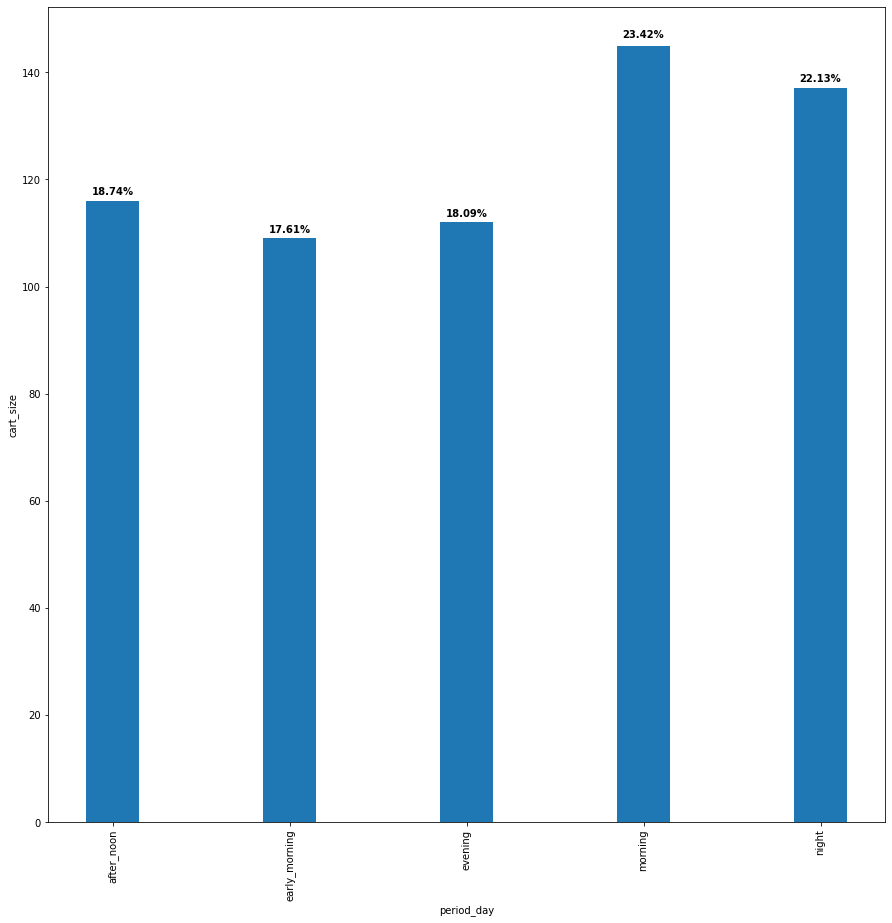

In [56]:
period_day = ["after_noon","early_morning","evening","morning","night"]
cart_size = [116,109,112,145,137]
getBarPlot(period_day,cart_size,"period_day","cart_size")


### Observation:-
#### Cart size will be more in the mornings

In [58]:
df_ = df_mega[["reordered","days_since_prior_order"]]
df_weekly = df_[df_["days_since_prior_order"] == 7 ]
df_weekly = dict(df_weekly["reordered"].value_counts())
list_1 = list(df_weekly.keys())
list_2 = list(df_weekly.values())

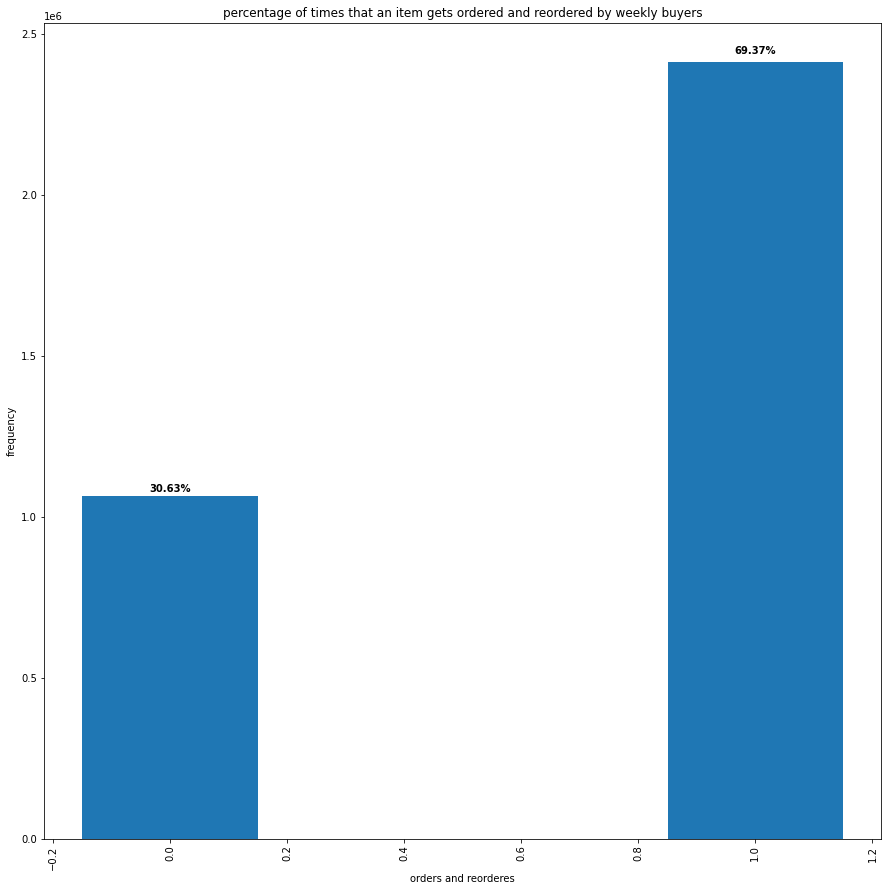

In [59]:
plt.figure(figsize=(15,15))
#     plt.subplot(1, 2, 1)
graph = plt.bar(list_1,list_2,width=0.3)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((list_2[i]/sum(list_2))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xlabel("orders and reorderes")
plt.ylabel("frequency")
plt.title("percentage of times that an item gets ordered and reordered by weekly buyers")
plt.xticks(rotation=90)
plt.show()

### Observation:-
#### Most of the reorders are placed by weekly buyers it is almost 70%

In [60]:
df_ = df_mega[["reordered","days_since_prior_order"]]
df_monthly = df_[df_["days_since_prior_order"] == 30 ]
df_monthly = dict(df_monthly["reordered"].value_counts())
list_1 = list(df_monthly.keys())
list_2 = list(df_monthly.values())

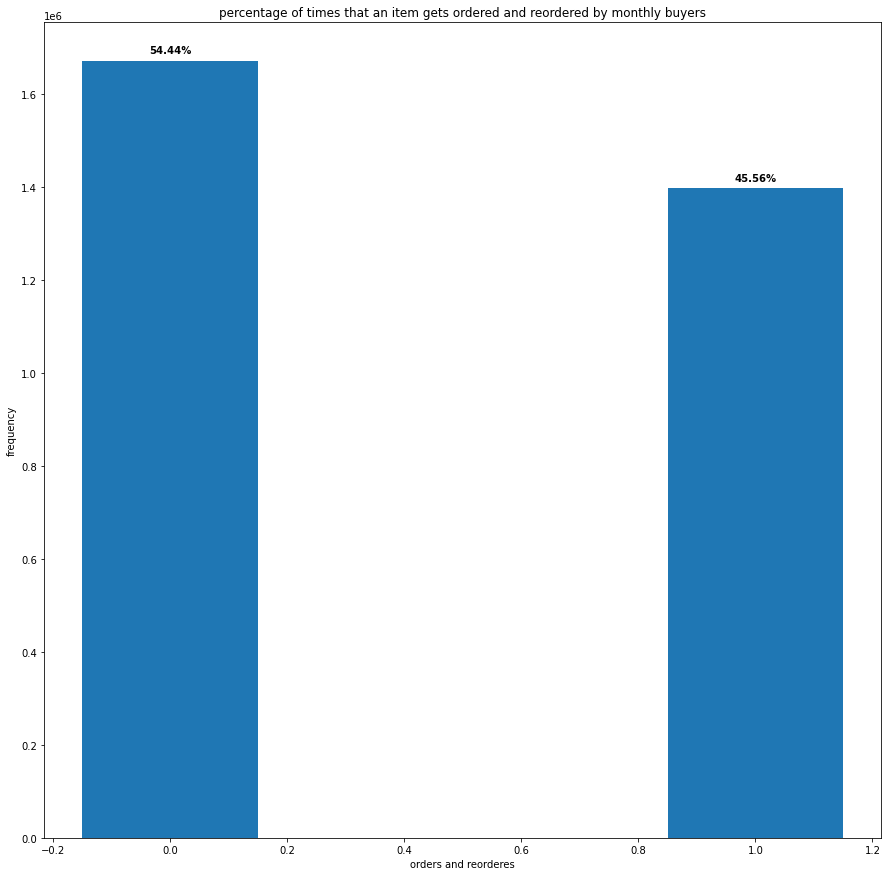

In [61]:
plt.figure(figsize=(15,15))
#     plt.subplot(1, 2, 1)
graph = plt.bar(list_1,list_2,width=0.3)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((list_2[i]/sum(list_2))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xlabel("orders and reorderes")
plt.ylabel("frequency")
plt.title("percentage of times that an item gets ordered and reordered by monthly buyers")
# plt.xticks(rotation=90)
plt.show()

### Observation:-
#### Most no of oreders are placed placed by monthly buyers i.e 55%

In [62]:
def convertToweeks(number):
    if number >= 0 and number <7:
        return "first__week"
    elif number >= 7 and number <14:
        return "second_week"
    elif number >= 14 and number < 21:
        return "third_week"
    elif number >=21 and number <= 28:
        return "fourth_week"
    else:
        return "last_days_of month"

In [63]:
df_mega["weeks"] = df_mega["days_since_prior_order"].apply(convertToweeks)

In [64]:
df_ = df_mega[["reordered","weeks"]]
df_ = df_[df_["reordered"] == 1]
df_weekly = dict(df_["weeks"].value_counts())
list_1 = list(df_weekly.keys())
list_2 = list(df_weekly.values())

In [65]:
df_ = df_mega[["reordered","weeks"]]
df_ = df_[df_["reordered"] == 0]
df_weekly = dict(df_["weeks"].value_counts())
list_3 = list(df_weekly.keys())
list_4 = list(df_weekly.values())

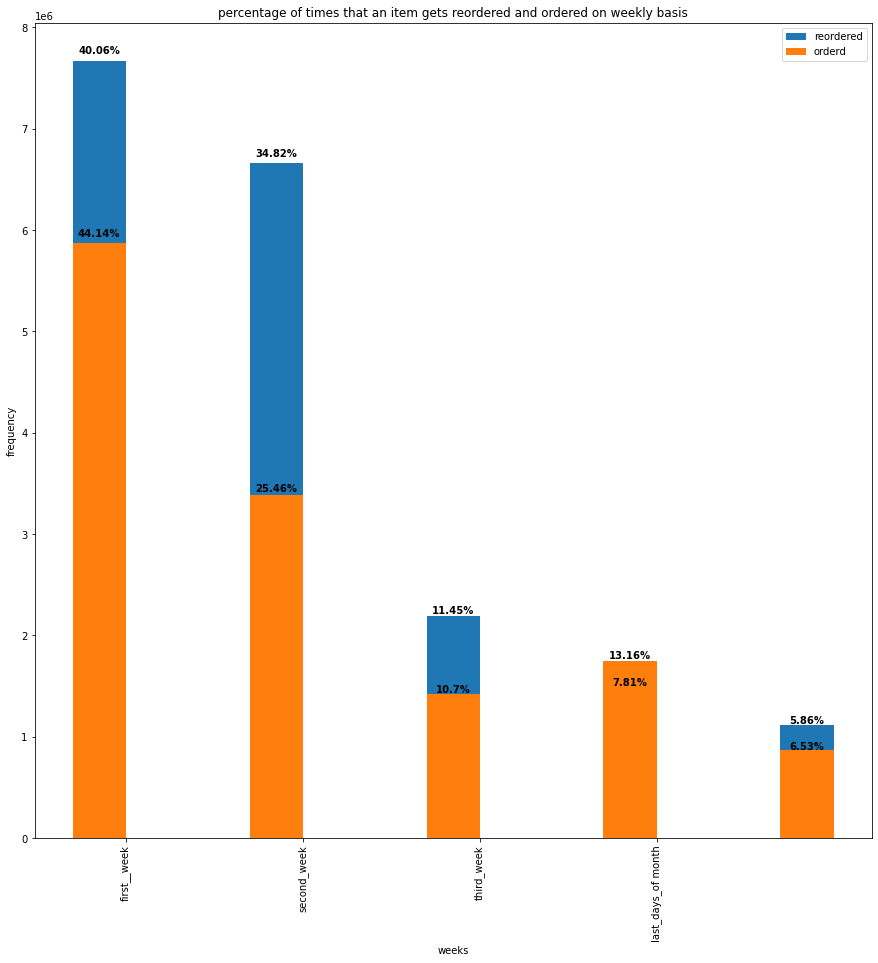

In [66]:
plt.figure(figsize=(15,15))
#     plt.subplot(1, 2, 1)
graph = plt.bar(list_1,list_2,width=0.3)
graph_ = plt.bar(list_3,list_4,width=0.3)
r = np.arange(4)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((list_2[i]/sum(list_2))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
i = 0
for p in graph_:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((list_4[i]/sum(list_4))*100,2))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xlabel("weeks")
plt.ylabel("frequency")
plt.xticks(r + width/2)
plt.title("percentage of times that an item gets reordered and ordered on weekly basis")
plt.xticks(rotation=90)
plt.legend(["reordered", "orderd"], loc ="upper right")
plt.show()

### Observation:-
#### Almost half of the reorders and orders are placed on first month of the week

In [67]:
users = list(df_mega["user_id"].values)
user_dict = {}
for i in users:
    if i not in user_dict:
        user_dict[i] = 1
    else:
        user_dict[i] += 1
user_dict_new = {k: v for k, v in sorted(user_dict.items(), key=lambda item: item[1])}

In [68]:
values = list(user_dict_new.values())

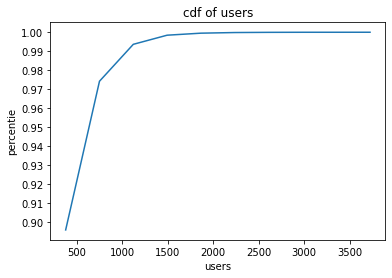

In [69]:
counts, bin_edges = np.histogram(values,bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
# plt.xticks(np.arange(500,3500,step=100))
plt.xlabel("users")
plt.ylabel("percentie")
plt.title("cdf of users")
plt.yticks([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.show()

### Observation:-
#### About 99 percentile of people have ordered items morethan 1000

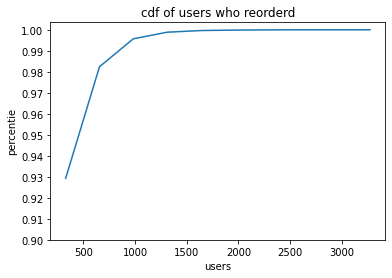

In [70]:
df_users_reorder = df_mega[["user_id","reordered"]]
df_users_reorder_new = df_users_reorder[df_users_reorder["reordered"] == 1]
df_users_reorder_new = dict(df_users_reorder_new["user_id"].value_counts())
user_dict_new = {k: v for k, v in sorted(df_users_reorder_new.items(), key=lambda item: item[1])}
values = list(user_dict_new.values())
counts, bin_edges = np.histogram(values,bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
# plt.xticks(np.arange(500,3500,step=100))
plt.xlabel("users")
plt.ylabel("percentie")
plt.title("cdf of users who reorderd")
plt.yticks([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.show()

In [71]:
np.percentile(values,99)

783.0

### Observation:-
#### 99% percentile i.e 783 people have reordered

### References

#### Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
        
#### Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html¶

#### https://www.kaggle.com/competitions/instacart-market-basket-analysis/overview